<a href="https://colab.research.google.com/github/luiselys/NGG6050/blob/main/HW4_LATER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Get the Data

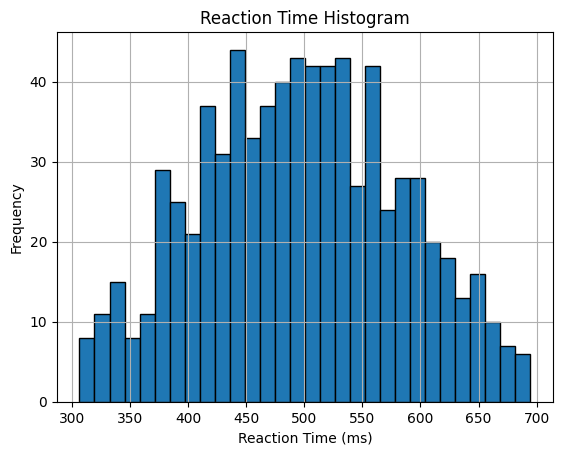

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for generating synthetic data
num_trials = 1000           # Total number of trials
mean_RT = 500               # Mean RT in milliseconds
std_dev_RT = 100            # Standard deviation of RT
min_RT = 300                # Minimum acceptable RT (to remove outliers)
max_RT = 700                # Maximum acceptable RT (to remove outliers)
probability_of_correct = 0.8  # Probability of correct response

# Initialize a list to store the RTs
RTs = []

# Generate synthetic RT data
for trial in range(num_trials):
    # Generate a random value to check for correctness
    is_correct = np.random.rand() < probability_of_correct

    # Generate a random RT based on Gaussian distribution
    generated_RT = mean_RT + std_dev_RT * np.random.randn()

    # Check for correctness and outlier
    if is_correct and min_RT <= generated_RT <= max_RT:
        RTs.append(generated_RT)
    else:
        # If it's incorrect or an outlier, exclude it
        RTs.append(None)

# Remove None values (outliers and incorrect trials)
RTs = [rt for rt in RTs if rt is not None]

# Now, RTs contains a preprocessed dataset with only correct trials and removed outliers.

# Plot a histogram of the RTs
plt.hist(RTs, bins=30, edgecolor='k')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')
plt.title('Reaction Time Histogram')
plt.grid(True)

# Show the histogram
plt.show()

# You can use this preprocessed dataset for fitting the LATER model or any other analysis you need.

# Step 2: Define the Objective Function

In [3]:
import numpy as np
from scipy.stats import norm

# Define the objective function
def LATERObjective(params, observed_data):
    muR, deltaS = params

    # Calculate mu and sigma based on LATER model parameters
    mu = muR / deltaS
    sigma = 1 / deltaS

    # Calculate the likelihood of the observed data given the model
    likelihoods = norm.pdf(1 / observed_data, loc=mu, scale=sigma)

    # Calculate the log-likelihoods (step 2)
    log_likelihoods = np.log(likelihoods)

    # Sum the log-likelihoods from all data points (step 3)
    sum_log_likelihoods = np.sum(log_likelihoods)

    # Take the negative of the sum (step 4)
    neg_log_likelihood = -sum_log_likelihoods

    return neg_log_likelihood

# Exercise: Objective function as a function of fits



In [6]:
# Define the objective function as a function of muR (keeping deltaS fixed)
def LATERObjective_muR(muR, observed_data, fixed_deltaS):
    # Calculate mu and sigma based on the fixed deltaS
    deltaS = fixed_deltaS
    mu = muR / deltaS
    sigma = 1 / deltaS

    # Calculate the likelihood of the observed data given the model
    likelihoods = norm.pdf(1 / observed_data, loc=mu, scale=sigma)

    # Calculate the log-likelihoods
    log_likelihoods = np.log(likelihoods)

    # Sum the log-likelihoods
    sum_log_likelihoods = np.sum(log_likelihoods)

    # Take the negative of the sum
    neg_log_likelihood = -sum_log_likelihoods

    return neg_log_likelihood

In [7]:
# Define the objective function as a function of deltaS (keeping muR fixed)
def LATERObjective_deltaS(deltaS, observed_data, fixed_muR):
    # Calculate mu and sigma based on the fixed muR
    muR = fixed_muR
    mu = muR / deltaS
    sigma = 1 / deltaS

    # Calculate the likelihood of the observed data given the model
    likelihoods = norm.pdf(1 / observed_data, loc=mu, scale=sigma)

    # Calculate the log-likelihoods
    log_likelihoods = np.log(likelihoods)

    # Sum the log-likelihoods
    sum_log_likelihoods = np.sum(log_likelihoods)

    # Take the negative of the sum
    neg_log_likelihood = -sum_log_likelihoods

    return neg_log_likelihood

#Step 3: Defining the initial conditions

In [10]:
import numpy as np
from scipy.optimize import minimize

# Define the observed data (replace with your actual dataset)
observed_data = [500, 550, 600, 520, 480, 530, 610, 490, 540, 520]

# Define initial conditions for optimization
initial_params = [500, 100]  # Initial values for muR and deltaS

# Define lower bounds for parameters
lower_bounds = [0.001, 0.001]

# Define upper bounds for parameters
upper_bounds = [1000, 1000]

# Print the initial values
print("Initial muR:", initial_params[0])
print("Initial deltaS:", initial_params[1])

# Define the objective function
def LATERObjective(params):
    muR, deltaS = params

    # Calculate mu and sigma based on LATER model parameters
    mu = muR / deltaS
    sigma = 1 / deltaS

    # Calculate the likelihood of the observed data given the model
    likelihoods = [1 / x for x in observed_data]
    likelihoods = norm.pdf(likelihoods, loc=mu, scale=sigma)

    # Calculate the log-likelihoods
    log_likelihoods = np.log(likelihoods)

    # Sum the log-likelihoods
    sum_log_likelihoods = np.sum(log_likelihoods)

    # Take the negative of the sum
    neg_log_likelihood = -sum_log_likelihoods

    return neg_log_likelihood

# Perform the optimization with bounds
result = minimize(LATERObjective, initial_params, bounds=list(zip(lower_bounds, upper_bounds)))

# Extract the optimized muR and deltaS
fitted_muR, fitted_deltaS = result.x

# Display the results
print("Optimized muR:", fitted_muR)
print("Optimized deltaS:", fitted_deltaS)

Initial muR: 500
Initial deltaS: 100
Optimized muR: 500.0
Optimized deltaS: 100.0


<ipython-input-10-e1471eeadc18>:33: RuntimeWarning: divide by zero encountered in log
  log_likelihoods = np.log(likelihoods)


#Step 4: Run the fits

In [11]:
import numpy as np
from scipy.optimize import minimize, shgo
from scipy.stats import norm

# Define the observed data (replace with your actual dataset)
observed_data = [500, 550, 600, 520, 480, 530, 610, 490, 540, 520]

# Define initial conditions for optimization
initial_params = [500, 100]  # Initial values for muR and deltaS

# Define lower bounds for parameters
lower_bounds = [0.001, 0.001]

# Define upper bounds for parameters
upper_bounds = [1000, 1000]

# Print the initial values
print("Initial muR:", initial_params[0])
print("Initial deltaS:", initial_params[1])

# Define the objective function
def LATERObjective(params):
    muR, deltaS = params

    # Calculate mu and sigma based on LATER model parameters
    mu = muR / deltaS
    sigma = 1 / deltaS

    # Calculate the likelihood of the observed data given the model
    likelihoods = [1 / x for x in observed_data]
    likelihoods = norm.pdf(likelihoods, loc=mu, scale=sigma)

    # Calculate the log-likelihoods
    log_likelihoods = np.log(likelihoods)

    # Sum the log-likelihoods
    sum_log_likelihoods = np.sum(log_likelihoods)

    # Take the negative of the sum
    neg_log_likelihood = -sum_log_likelihoods

    return neg_log_likelihood

# Define the optimization problem using the minimize function
result = minimize(LATERObjective, initial_params, bounds=list(zip(lower_bounds, upper_bounds)))

# Extract the optimized muR and deltaS
fitted_muR, fitted_deltaS = result.x

# Display the results
print("Optimized muR:", fitted_muR)
print("Optimized deltaS:", fitted_deltaS)

Initial muR: 500
Initial deltaS: 100
Optimized muR: 500.0
Optimized deltaS: 100.0


<ipython-input-11-7cb4e931aae7>:34: RuntimeWarning: divide by zero encountered in log
  log_likelihoods = np.log(likelihoods)


#Step 5: Evaluate Fits

In [13]:
import numpy as np
from scipy.stats import norm

# Define the observed data (replace with your actual dataset)
observed_data = [500, 550, 600, 520, 480, 530, 610, 490, 540, 520]

# Define the optimized parameter values obtained from fitting
fitted_muR = 200  # Replace with your fitted muR
fitted_deltaS = 50  # Replace with your fitted deltaS

# Initialize variables for evaluation metrics
neg_log_likelihood = None
aic = None
bic = None

# Calculate mu and sigma based on the optimized parameters
mu = fitted_muR / fitted_deltaS
sigma = 1 / fitted_deltaS

# Calculate the likelihood of the observed data given the model
likelihoods = [1 / x for x in observed_data]
likelihoods = norm.pdf(likelihoods, loc=mu, scale=sigma)

# Calculate the log-likelihoods
log_likelihoods = np.log(likelihoods)

# Check for invalid values in log-likelihoods
if np.isinf(np.sum(log_likelihoods)) or np.isnan(np.sum(log_likelihoods)):
    print("Likelihood calculation issue. Check parameter values and data.")

else:
    # Compute the negative log-likelihood
    neg_log_likelihood = -np.sum(log_likelihoods)

    # Calculate the Akaike Information Criterion (AIC)
    n_data_points = len(observed_data)
    n_parameters = 2  # Number of parameters (muR and deltaS)
    aic = 2 * n_parameters - 2 * neg_log_likelihood

    # Calculate the Bayesian Information Criterion (BIC)
    bic = n_parameters * np.log(n_data_points) - 2 * neg_log_likelihood

# Display the results and evaluation metrics
if neg_log_likelihood is not None:
    print("Negative Log-Likelihood:", neg_log_likelihood)
    print("Akaike Information Criterion (AIC):", aic)
    print("Bayesian Information Criterion (BIC):", bic)

Likelihood calculation issue. Check parameter values and data.


<ipython-input-13-6e21e77d9e4e>:25: RuntimeWarning: divide by zero encountered in log
  log_likelihoods = np.log(likelihoods)


#### Exercise: How do you know you got a reasonable answer?
We calculate the negative log-likelihood, which quantifies how well the model fits the data. A lower value indicates a better fit.

We calculate the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). These are information criteria that consider both model fit and model complexity. Lower AIC and BIC values indicate a better trade-off between fit and model complexity.

By comparing the negative log-likelihood, AIC, and BIC to those of alternative models or assessing their absolute values, you can evaluate the quality of the fits and determine if the parameter estimates are reasonable. Lower negative log-likelihood and information criteria values are generally indicative of better fits.